In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Iris.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.drop('Id',axis=1,inplace=True)
df=df.replace(to_replace = ['Iris-setosa','Iris-versicolor', 'Iris-virginica' ], value = [0, 1, 2])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

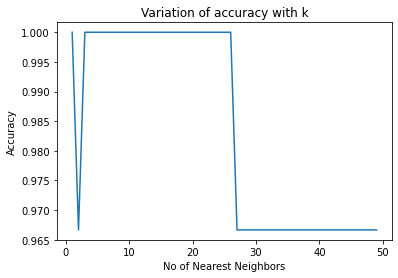

In [7]:
Acc = []
n = 50
for i in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(X_train,y_train)
    preds = model.predict(X_test)
    Acc.append(metrics.accuracy_score(y_test,preds))

plt.plot(range(1, n), Acc)
plt.title('Variation of accuracy with k')
plt.xlabel('No of Nearest Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [8]:
max_index = Acc.index(max(Acc))
print('Optimum number of Nearest Neighbors:' , (max_index+1))
print('Accuracy for {0} - Nearest Neighbors: {1}'.format(max_index+1, Acc[max_index]))

Optimum number of Nearest Neighbors: 1
Accuracy for 1 - Nearest Neighbors: 1.0


In [9]:
res_list = []
for i in range(0, len(Acc)):
    if Acc[i] == 1.0:
        res_list.append(i)
          
print("New indices list : " + str(res_list))
        
   


New indices list : [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
